<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [7]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

confusion = confusion_matrix(y, y_pred)
print(confusion)

[[337  20]
 [ 30 182]]


* 정확도

In [9]:
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.9121265377855887


* 정밀도

In [10]:
precision = precision_score(y, y_pred)
print(precision)

0.900990099009901


* 재현율

In [13]:
recall = recall_score(y, y_pred)
print(recall)

0.8584905660377359


* F1 score

In [14]:
from sklearn.metrics import f1_score
f1 = f1_score(y, y_pred)

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [22]:
from sklearn.preprocessing import Binarizer
pred_proba=model_lor.predict_proba(X)

mypred_proba=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=0.1) 

y_pred2=binarizer.transform(mypred_proba)

In [26]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

# 혼동행렬
print(confusion_matrix(y,y_pred2))
# 정확도
print(accuracy_score(y, y_pred2))
# 정밀도
print(precision_score(y,y_pred2))
# 재현율
print(recall_score(y,y_pred2))
# f1 score
print(f1_score(y, y_pred2))

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

In [27]:
from sklearn.metrics import roc_curve 
myproba = model_lor.predict_proba(X) 
fpr, tpr, thresholds = roc_curve(y, myproba[:,1])

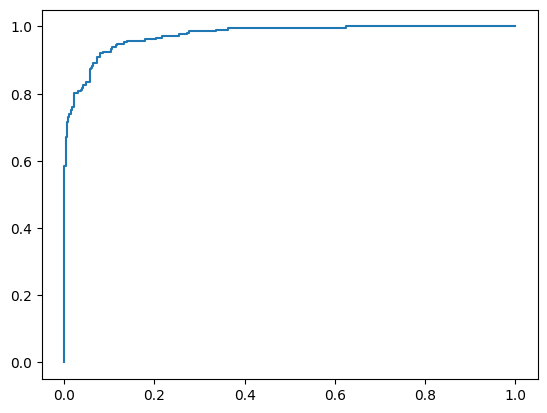

In [28]:
import matplotlib.pyplot as plt 
plt.plot(fpr, tpr, label="ROC")

* ROC AUC 값

In [29]:
from sklearn.metrics import roc_auc_score
print(round(roc_auc_score(y, y_pred), 3))

0.901
